### Steps for CNN of ASL Dataset

Load ASL training and test datasets 
- don't know how to process the image from individual pixels to torch or matplotlib
Define a Convolutional Neural Network
- working on understand different parts of torch architecture steps
Define a loss function
Train the network on the training data
Test the network on the test data

Visualize # of each letter in datasets(Bar graph to show samples in each class)
Randomly generate 1 sample from each class
Show correctly classified and wrongly classified to show why some are easier to classify vs harder to classify


In [ ]:
import pandas as pd
import numpy as np
import torch
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image

In [5]:
df_test = pd.read_csv('./sign_mnist_test.csv')
df_train = pd.read_csv('./sign_mnist_train.csv')

In [9]:
df_train.head()
df_test.head()
print(df_train.shape)
print(df_test.shape)

(27455, 785)
(7172, 785)


In [7]:
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [52]:
#separate labels (letter classes) from training data set
#drop label from rest of pixels
labels = df_train['label']
df_train = df_train.drop('label',axis = 1)

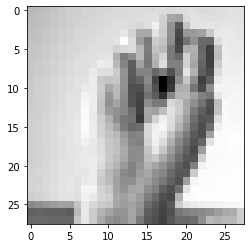

In [70]:
#convert each image to a 28x28 array
testimg = np.array(df_train[4:5]).reshape(28,28)
plt.imshow(testimg,cmap = 'gray') #they're not greyscale???

In [19]:
# from image processing tutorial
def plot_image(image, color_map = None, title = None):
#     raise NotImplementedError    # delete this line to write the function
    plt.imshow(image, cmap = color_map)
    plt.title(title)
    plt.axis('off')
    plt.show()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,13,189,189,190,190,192,193,193,193,193,...,132,165,99,77,52,200,234,200,222,225
27451,23,151,154,157,158,160,161,163,164,166,...,198,198,198,198,198,196,195,195,195,194
27452,18,174,174,174,174,174,175,175,174,173,...,121,196,209,208,206,204,203,202,200,200
27453,17,177,181,184,185,187,189,190,191,191,...,119,56,27,58,102,79,47,64,87,93
